<a href="https://www.kaggle.com/code/vishnudeepak23/eda-on-us-accidents?scriptVersionId=91448760" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


In [2]:
#loading the data using pandas
df= pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv")
df.head(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# let us also check the aggregrating statistics for the numerical columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


# Data preperation and Cleaning


In [4]:
# dealing with missing values
missing= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.notnull().count()*100).sort_values(ascending=False)
Total_missing_values= pd.concat([missing,percent],axis=1,keys=["missing","percent"])
Total_missing_values.head(15)



,missing,percent
Number,1743911,61.290031
Precipitation(in),549458,19.310789
Wind_Chill(F),469643,16.505678
Wind_Speed(mph),157944,5.550967
Wind_Direction,73775,2.592834
Humidity(%),73092,2.568830
Weather_Condition,70636,2.482514
Visibility(mi),70546,2.479350
Temperature(F),69274,2.434646
Pressure(in),59200,2.080593


<AxesSubplot:>

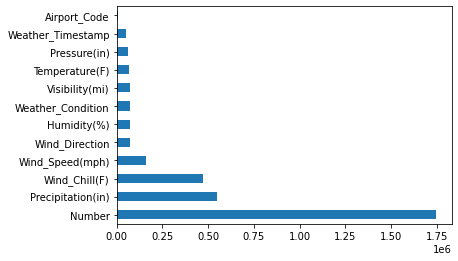

In [5]:
missing.head(12).plot(kind='barh')

from analysing the data we can see that certain columnns need to be dropped cause of the high number of missing values and certain columns are not relevant for further analysis
We can drop columns such as number. Also End_Lat& Lng could be dropped because the the distance variable can effectively replace them

In [6]:
#dropping the above mentioned variable.
new_df= df.drop(['Number','End_Lat','End_Lng'],axis="columns")
Total_missing_values[Total_missing_values["missing"]>1000]

,missing,percent
Number,1743911,61.290031
Precipitation(in),549458,19.310789
Wind_Chill(F),469643,16.505678
Wind_Speed(mph),157944,5.550967
Wind_Direction,73775,2.592834
Humidity(%),73092,2.568830
Weather_Condition,70636,2.482514
Visibility(mi),70546,2.479350
Temperature(F),69274,2.434646
Pressure(in),59200,2.080593


In [7]:
new_df= new_df.dropna(subset=["Weather_Condition","Weather_Timestamp","Airport_Code","Timezone","Nautical_Twilight","Civil_Twilight",
                             "Sunrise_Sunset","Zipcode","Astronomical_Twilight",])
new_df["Wind_Speed(mph)"].interpolate(method= 'linear',limit_direction="forward",inplace=True)

In [8]:
# filling the missing values with mean and median values
new_df["Precipitation(in)"].fillna(new_df["Precipitation(in)"].median(),inplace=True)
new_df["Wind_Chill(F)"].fillna(new_df["Wind_Chill(F)"].mean(),inplace=True)
new_df["Temperature(F)"].fillna(new_df["Temperature(F)"].median(),inplace=True)

# Exploratory Analysis and Visualization

## Location(States, Cities and streets) based analysis:

In [9]:
new_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

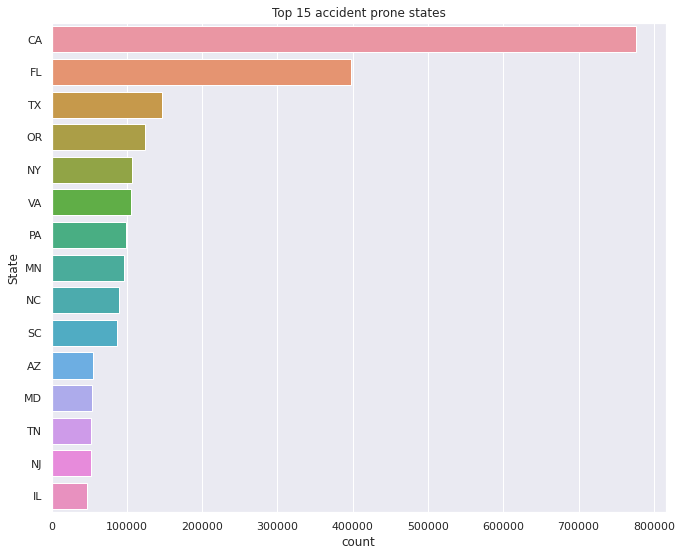

In [10]:
# 15 most accident prone states 
state_count15=new_df["State"].value_counts().sort_values(ascending=False)[:15]
sns.set_style('white')
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x=state_count15.values,y= state_count15.index)
plt.xlabel('count')
plt.ylabel('State')
plt.title("Top 15 accident prone states")
plt.show()

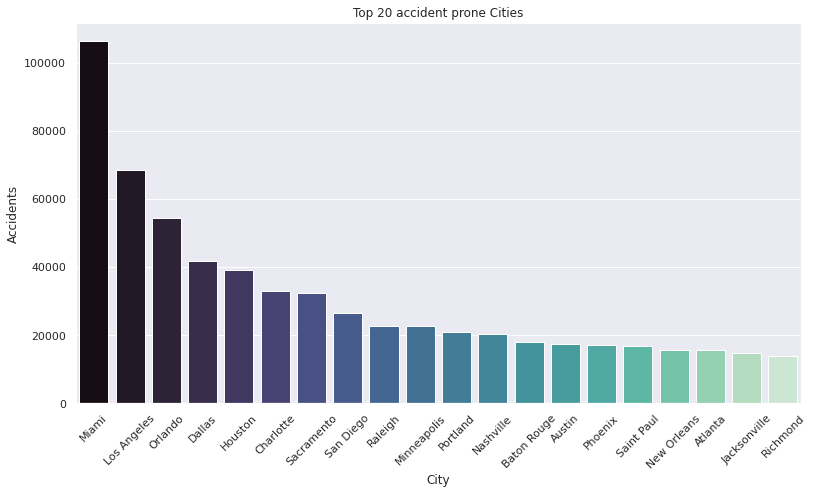

In [11]:
#20 most accident prone cities.
city_count= new_df.City.value_counts()
fig,axs= plt.subplots(figsize=(13,7))
sns.countplot(x="City",order= city_count.index[:20],data= new_df,palette= 'mako')
plt.ylabel('Accidents')
plt.xticks(rotation=45)
plt.title('Top 20 accident prone Cities')
plt.show()


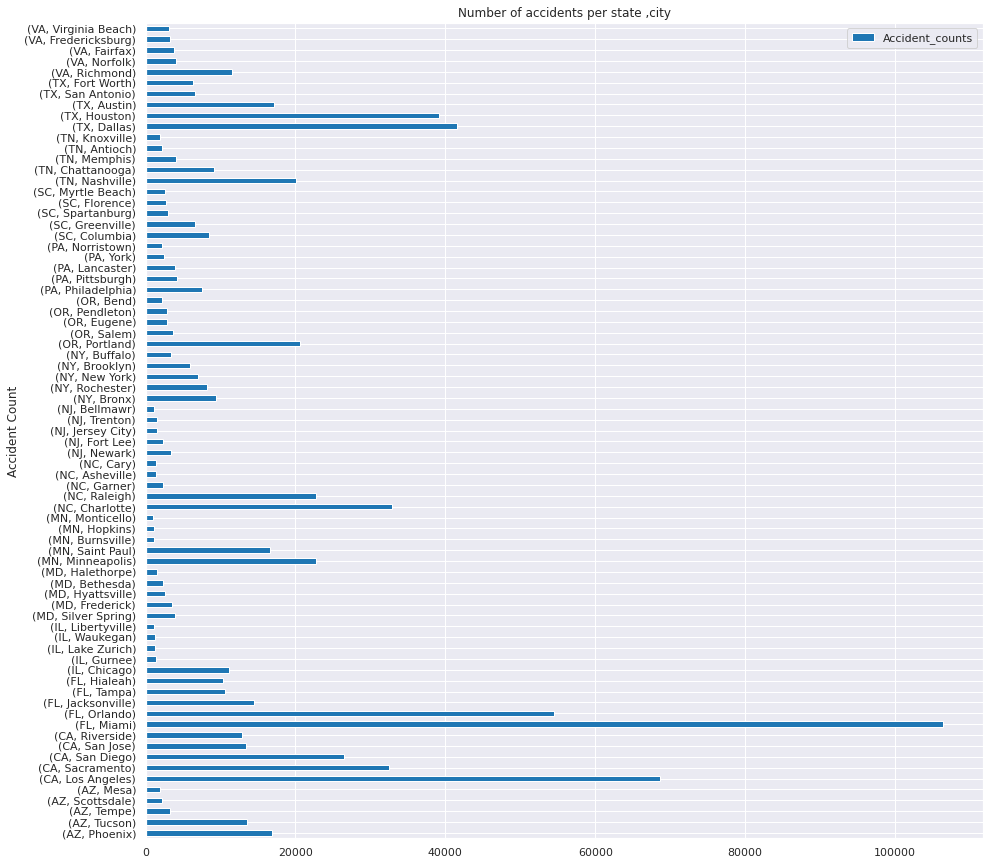

In [12]:
#Finding out which cities are the most accident prone among the accident prone states.
accident_states_df= new_df[new_df['State'].isin(state_count15.index.to_list())]
state_city_df=accident_states_df.groupby(["State","City"])["ID"].count().rename("Accident_counts")
state_city_df= state_city_df.reset_index().groupby(["State"],as_index=False).apply(lambda x: x.nlargest(5,'Accident_counts'))
state_city_df.set_index(keys=['State', 'City']).plot.barh(color=("tab:blue"), figsize=(15, 15))
plt.title("Number of accidents per state ,city")
plt.ylabel('Accident Count')
plt.show()


## Time Based analysis

In [13]:
new_df['Start_Time']= pd.to_datetime(new_df.Start_Time)

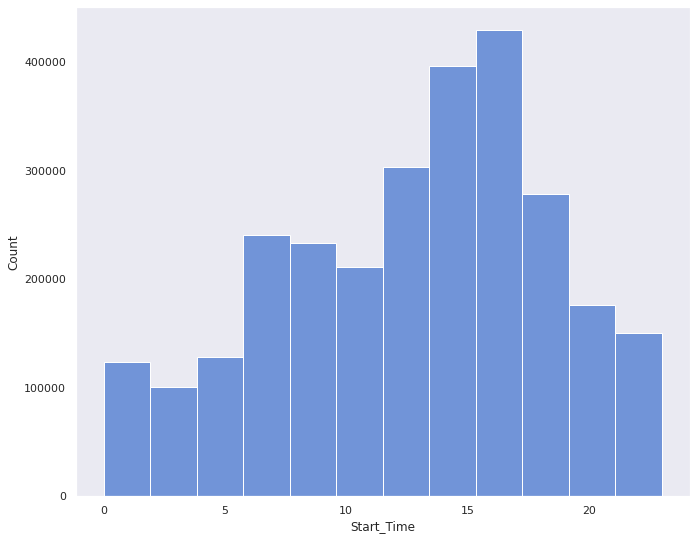

In [14]:
#Accidents by the hour
hr=new_df.Start_Time.dt.hour
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.histplot(hr,bins= 12);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


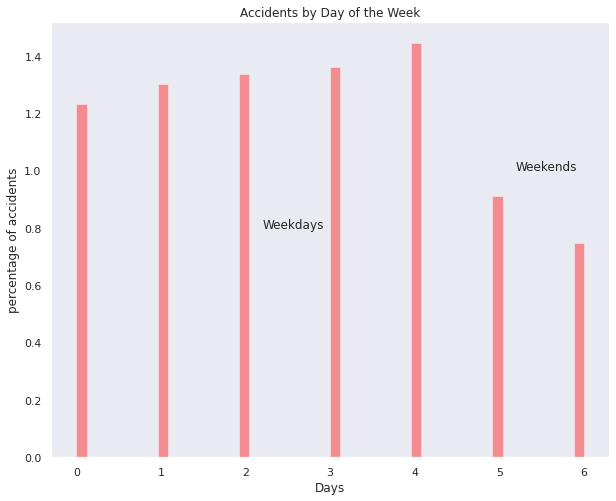

In [15]:
#Accident occurence by day of week
days=new_df.Start_Time.dt.dayofweek
fig, axs = plt.subplots(figsize=(10,8))
sns.distplot(days,kde=False,norm_hist=True,color='red');
plt.annotate('Weekdays',xy=(2.2,0.8))
plt.annotate('Weekends',xy=(5.2,1.0))
plt.xlabel('Days')
plt.ylabel('percentage of accidents')
plt.title('Accidents by Day of the Week')
plt.show();

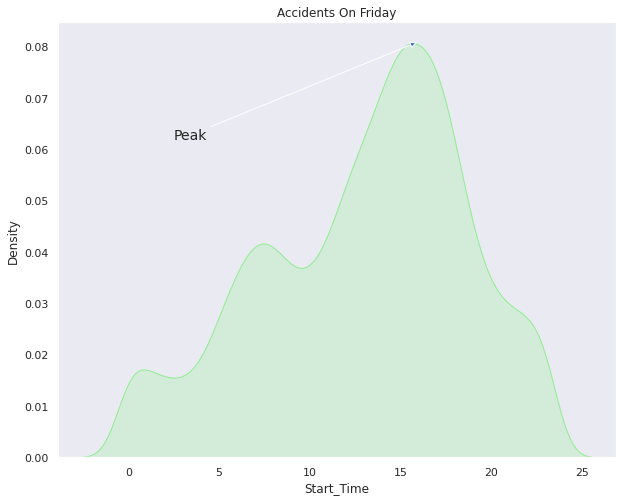

In [16]:
#As we can see friday has the highest percentage of casualities. Lets take a closer look at Friday.
fridays=new_df[new_df.Start_Time.dt.dayofweek==4]
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(fridays.Start_Time.dt.hour,fill=True,bw_adjust=2,color='lightgreen',data=fridays);
plt.annotate('Peak',xy=(16,0.081),xytext=(2.5,0.062),arrowprops={'arrowstyle':'-|>'},fontsize= 14)
plt.title('Accidents On Friday')
plt.show()



In [17]:
new_df['Year']=new_df.Start_Time.dt.year


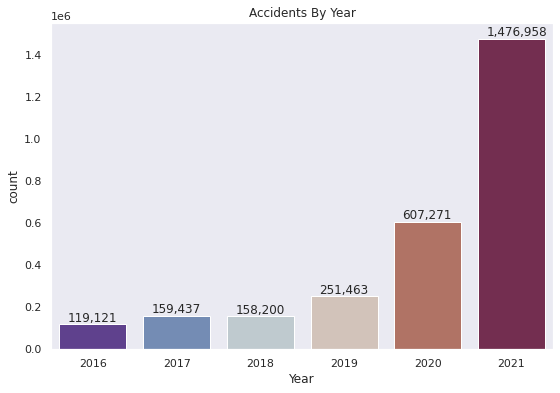

In [18]:
#Yearly Accident analysis
fig,axs= plt.subplots(figsize=(9,6))
sns.countplot(x='Year',data=new_df,palette = 'twilight_shifted' );
for i in axs.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.70
    y = i.get_height()+11500
    axs.annotate(count, (x, y))
plt.title("Accidents By Year")
plt.show()

In [19]:
new_df['Month']=new_df.Start_Time.dt.month
new_df.Month= new_df.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
new_df.Month.value_counts().sort_values()

Mar    154328
Jul    154839
Apr    168312
Aug    174149
May    178110
Feb    190147
Jan    192678
Jun    220656
Sep    235249
Oct    292006
Nov    349150
Dec    462826
Name: Month, dtype: int64

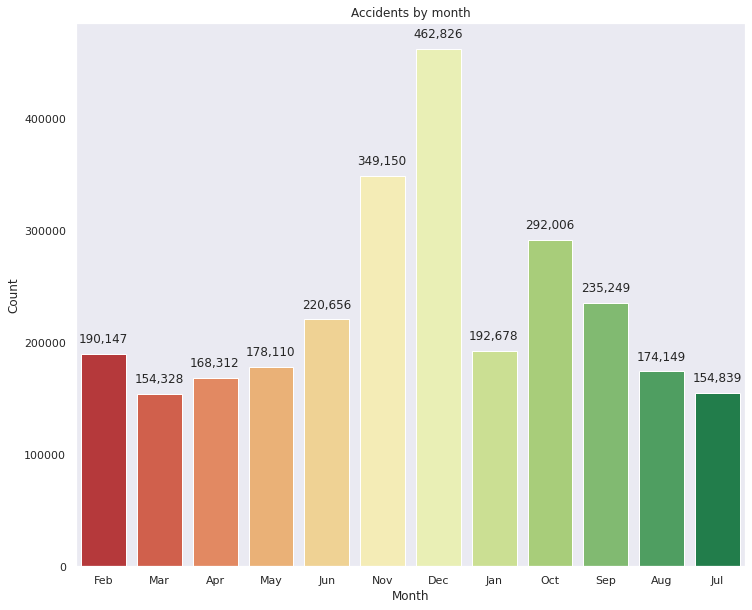

In [20]:
#Monthly Analysis of accidents
fig,axs= plt.subplots(figsize=(12,10))
sns.countplot(x='Month', data=new_df,palette='RdYlGn')
for i in axs.patches:
    x= i.get_x()+i.get_width()-0.85
    y= i.get_height()+ 10000
    count= '{:,.0f}'.format(i.get_height())
    axs.annotate(count,(x,y))
axs.set(xlabel='Month',ylabel='Count',title='Accidents by month')
plt.show();


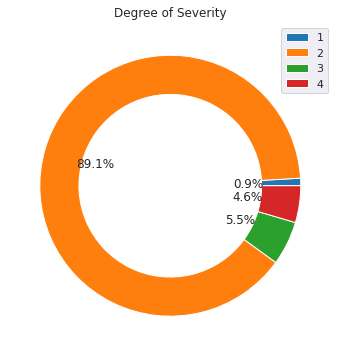

In [21]:
# severity analysis
fig,axs= plt.subplots(figsize=(9,6))
cmap=plt.get_cmap('tab10')
clr=cmap(np.arange(4))
accidents_severity= new_df.groupby('Severity').count()['ID']
plt.pie(accidents_severity,wedgeprops=dict(width=0.3),autopct='%.1f%%',colors= clr)
plt.legend(accidents_severity.index,loc='upper right')
plt.title('Degree of Severity')
plt.show();
#Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).



In [22]:
new_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month'],
      dtype='object')

## Weather based Analysis

In [23]:
weather_df = new_df.loc[:,'Temperature(F)':'Weather_Condition']
weather_df['Severity']=new_df['Severity']
weather_count=weather_df.Weather_Condition.value_counts()[:25]
weather_count

Fair                       1106081
Mostly Cloudy               363759
Cloudy                      348399
Partly Cloudy               249775
Clear                       173817
Light Rain                  128333
Overcast                     84878
Scattered Clouds             45129
Light Snow                   43664
Fog                          41192
Haze                         36334
Rain                         31031
Fair / Windy                 15158
Heavy Rain                   11816
Smoke                         7191
Light Drizzle                 7031
Thunder in the Vicinity       6932
Cloudy / Windy                6825
T-Storm                       6544
Mostly Cloudy / Windy         6290
Thunder                       6005
Light Rain with Thunder       5286
Snow                          5284
Partly Cloudy / Windy         3866
Wintry Mix                    3838
Name: Weather_Condition, dtype: int64

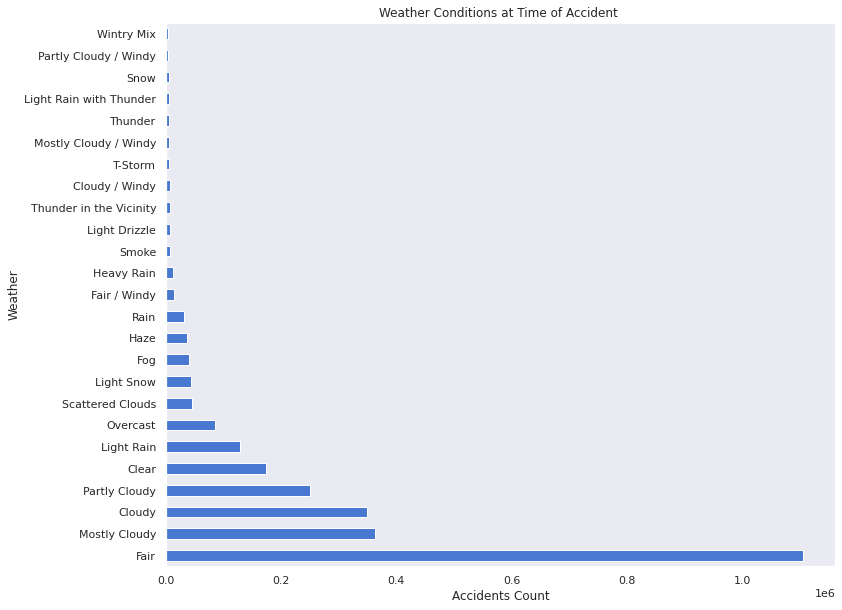

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
weather_count.plot(kind='barh')
ax.set(title = 'Weather Conditions at Time of Accident ',
       xlabel = 'Accidents Count',
       ylabel = 'Weather')
plt.show()

In [25]:
len(weather_df.Wind_Direction.unique())

25

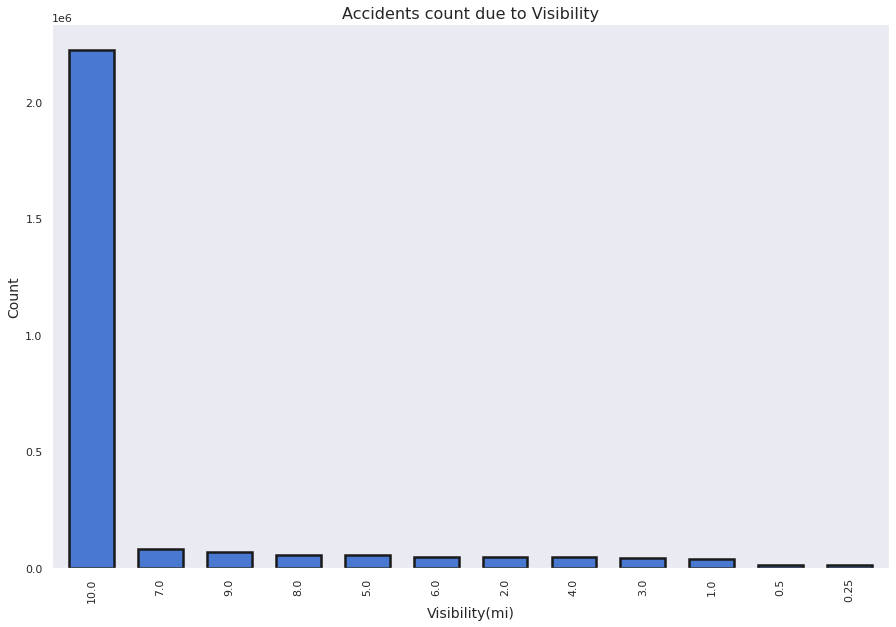

In [26]:
fig= plt.gcf()
fig.set_size_inches(15, 10);
#sns.displot(weather_df,x= 'Visibility(mi)',)
weather_df['Visibility(mi)'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.65,edgecolor='k',align='center',linewidth=2.5)
plt.xlabel('Visibility(mi)',fontsize=14)
plt.ylabel('Count',fontsize= 14)
plt.title('Accidents count due to Visibility',fontsize=16)
plt.show();



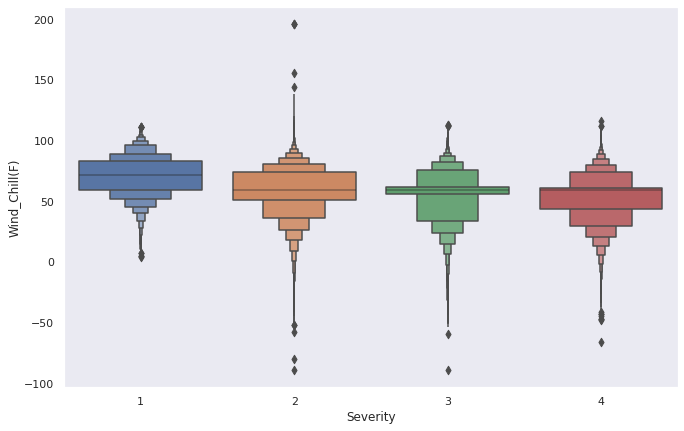

In [27]:
fig,axs= plt.subplots(figsize=(11,7))
sns.set_theme(style="whitegrid")
sns.boxenplot(x="Severity", y="Wind_Chill(F)",data= weather_df);

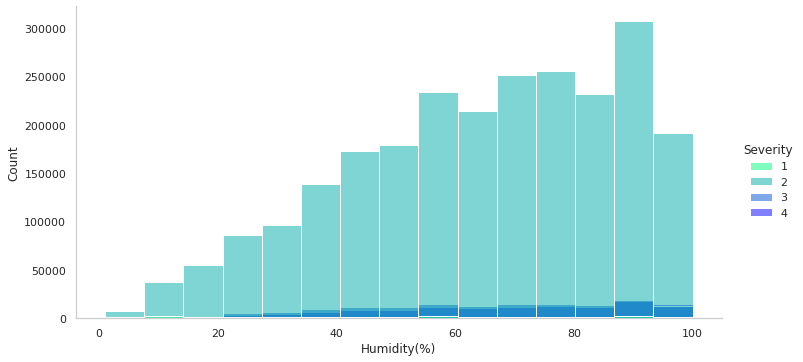

In [28]:
sns.set_style("whitegrid", {'axes.grid' : False})
hum=sns.displot(weather_df,x='Humidity(%)',hue='Severity',bins=15,palette = 'winter_r',height=5.2,aspect=2)



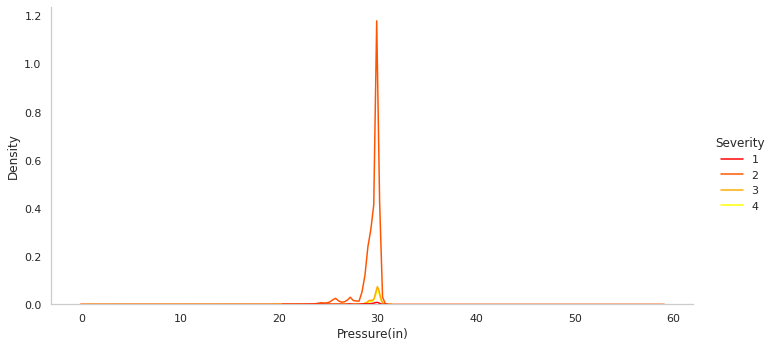

In [29]:
sns.displot(weather_df, x="Pressure(in)", hue="Severity",kind='kde',palette='autumn', height=5, aspect=2);

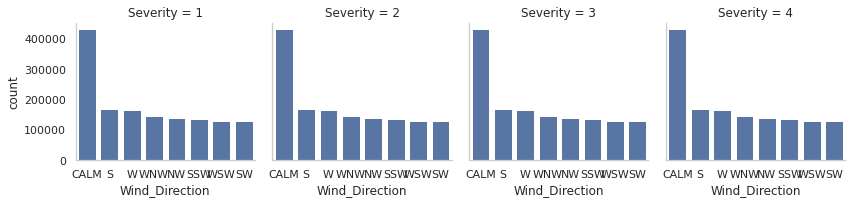

In [30]:
#len(weather_df.Wind_Direction.unique())
g = sns.FacetGrid(weather_df, col='Severity');
g.map(sns.countplot, order=weather_df.Wind_Direction.value_counts().iloc[:8].index,x='Wind_Direction',data= weather_df);


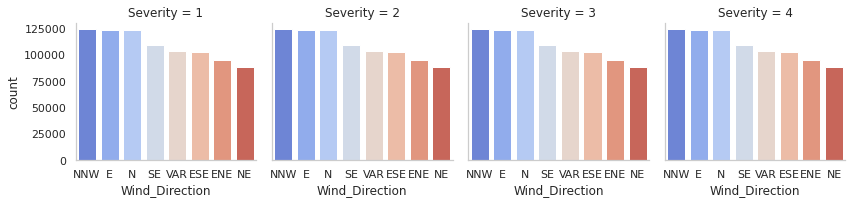

In [31]:
g = sns.FacetGrid(weather_df, col='Severity');
g.map(sns.countplot, order=weather_df.Wind_Direction.value_counts().iloc[9:17].index,x='Wind_Direction',palette='coolwarm',data= weather_df);

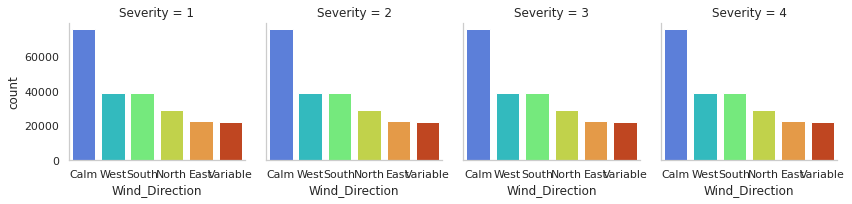

In [32]:
g = sns.FacetGrid(weather_df, col='Severity');
g.map(sns.countplot, order=weather_df.Wind_Direction.value_counts().iloc[18:].index,x='Wind_Direction',palette='turbo',data= weather_df);


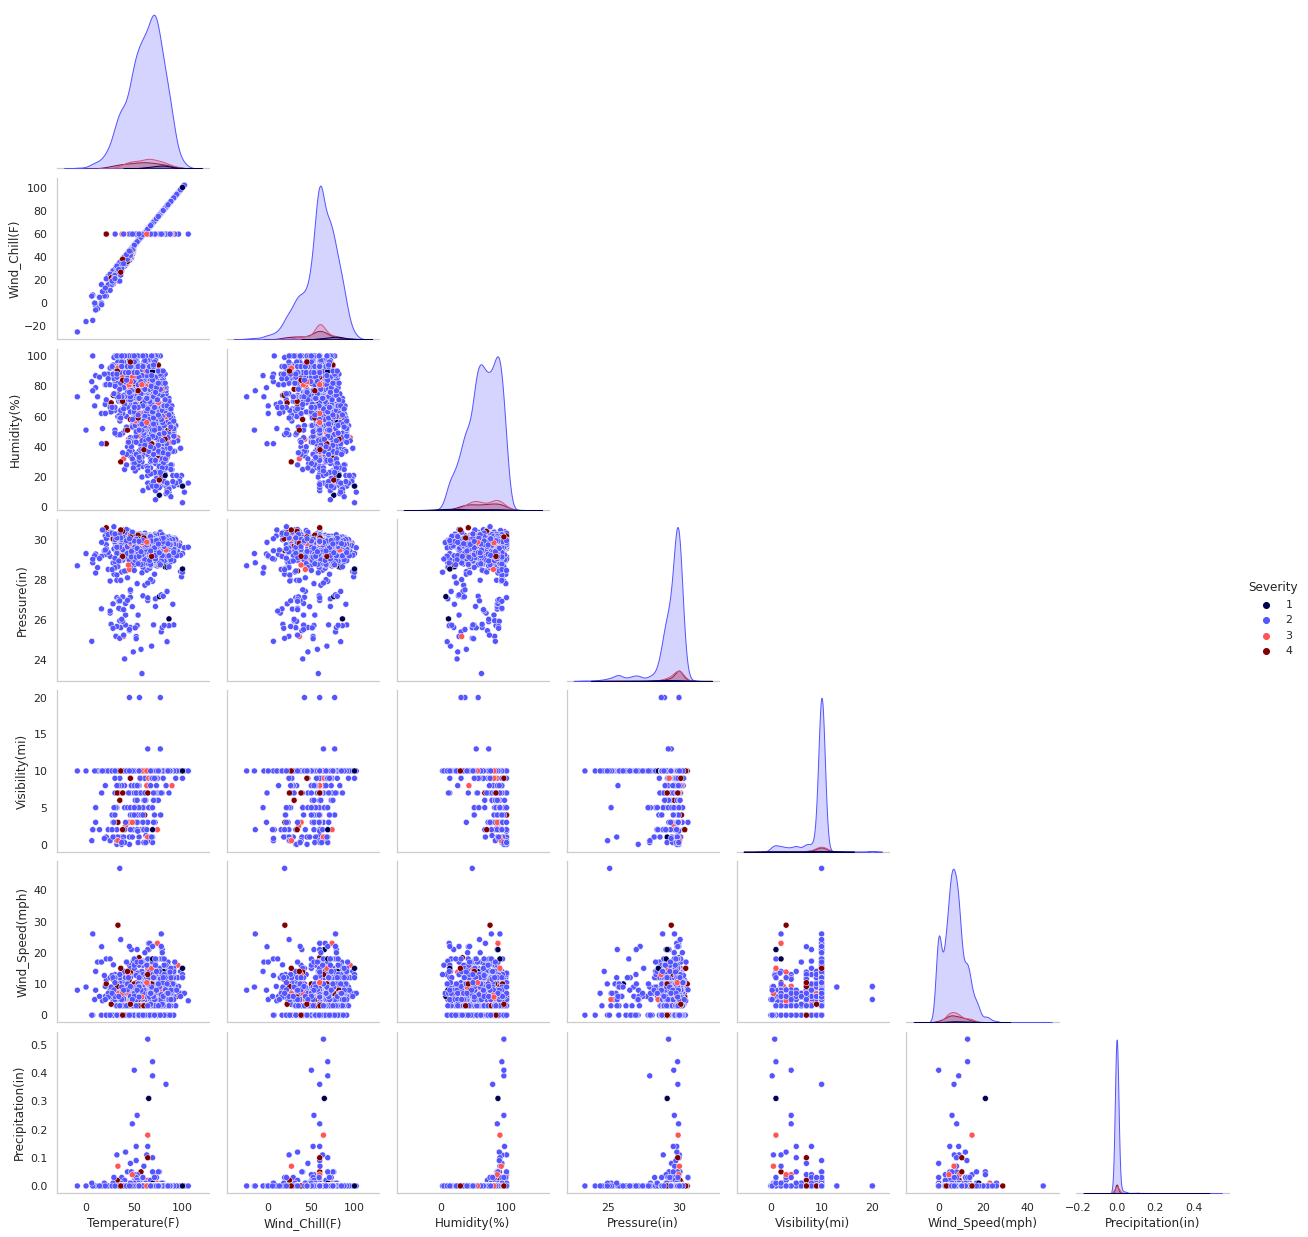

In [33]:
sns.pairplot(weather_df.sample(1000),hue ="Severity",corner=True,palette='seismic');

### Insights

* From location analysis it is evident that California is the most accident prone state followed by Florida and Texas.
* This is in accordance with their respective population with California being the most populous state in US.
* Miami, los angeles and Orlando make up the three most accident prone cities in the US.
* Accidents by the hour has 2 peaks,one during 6-10 am period and the notable peak during 2-7pm. This might be because, people leave and get back from work during these intervals, which results in greater movement of population and hence higher the chance of accidents.
* looking at the accidents by days of the week plot, we can see that weekdays have higher percentage of accident occurence when compared to weekends.
* Fridays record the highest percentage of accidents among all days. With the peak between 4-6pm.
* The yearly accident count reveals that 2021 is the most deadliest year on record followed by 2020 and 2019 respectively.
* Among the months december has the maximum number of accidents followed by november.
* The Severity analysis reveals that the vast majority of accidents are of type 2 -89.1%
* The vast majority of accidents occur at fair weather conditions.
